In [2]:
# Install if not already
# !pip install pandas scikit-learn matplotlib nltk

%pip install nltk

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string


     ---------------------------------------- 1.5/1.5 MB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 102.2/102.2 kB ? eta 0:00:00
     -------------------------------------- 274.1/274.1 kB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

# Load the CSV file
df = pd.read_csv("df_file.csv")

# Show first few rows and column names
print("📄 Column Names:", df.columns.tolist())
print(df.head())


📄 Column Names: ['Text', 'Label']
                                                Text  Label
0  Budget to set scene for election\n \n Gordon B...      0
1  Army chiefs in regiments decision\n \n Militar...      0
2  Howard denies split over ID cards\n \n Michael...      0
3  Observers to monitor UK election\n \n Minister...      0
4  Kilroy names election seat target\n \n Ex-chat...      0


In [5]:
# Download NLTK stopwords
nltk.download('stopwords')

# Define stopwords and stemmer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# Define cleaning function
def preprocess(text):
    if pd.isna(text):
        return ""
    text = text.lower()  # Lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    words = text.split()  # Tokenize
    words = [stemmer.stem(word) for word in words if word not in stop_words]  # Remove stopwords and stem
    return ' '.join(words)

# Apply cleaning
df['Cleaned_Text'] = df['Text'].apply(preprocess)

# Show cleaned text
df[['Text', 'Cleaned_Text']].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\navee\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


,Text,Cleaned_Text
0,Budget to set scene for election\n \n Gordon B...,budget set scene elect gordon brown seek put e...
1,Army chiefs in regiments decision\n \n Militar...,armi chief regiment decis militari chief expec...
2,Howard denies split over ID cards\n \n Michael...,howard deni split id card michael howard deni ...
3,Observers to monitor UK election\n \n Minister...,observ monitor uk elect minist invit intern ob...
4,Kilroy names election seat target\n \n Ex-chat...,kilroy name elect seat target exchat show host...


In [11]:
# Create TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=1000)  # Limit to 1000 features

# Fit and transform
X = vectorizer.fit_transform(df['Cleaned_Text'])

# Convert to DataFrame
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Show TF-IDF table
tfidf_df.head()


,10,100,11,12,13,15,16,18,20,2000,...,worri,worth,would,write,wrong,year,yet,york,young,yuko
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.053135,...,0.0,0.0,0.047279,0.0,0.0,0.04322,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.053169,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.176507,0.0,0.0,0.00000,0.0,0.0,0.039171,0.0
3,0.0,0.0,0.0,0.048873,0.0,0.0,0.0,0.054232,0.047193,0.000000,...,0.0,0.0,0.070453,0.0,0.0,0.00000,0.0,0.0,0.052117,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.043390,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0


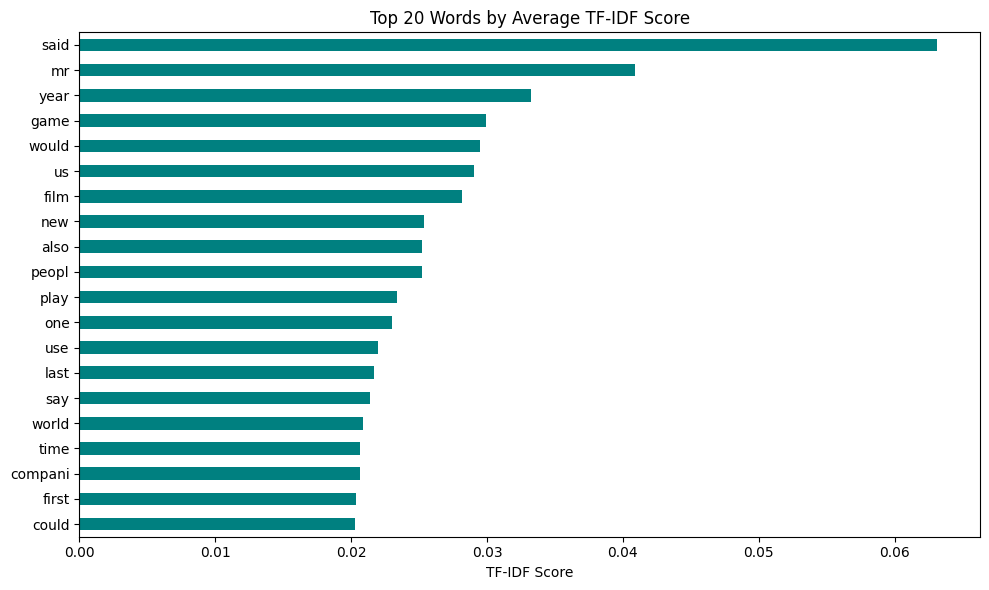

In [7]:
# Average TF-IDF scores for each word
avg_tfidf = tfidf_df.mean().sort_values(ascending=False)

# Plot top 20 words
plt.figure(figsize=(10, 6))
avg_tfidf.head(20).plot(kind='barh', color='teal')
plt.title("Top 20 Words by Average TF-IDF Score")
plt.xlabel("TF-IDF Score")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [8]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer for BoW
bow_vectorizer = CountVectorizer(max_features=1000)  # Optional: limit to top 1000 words

# Fit and transform the cleaned text
X_bow = bow_vectorizer.fit_transform(df['Cleaned_Text'])

# Convert to DataFrame
bow_df = pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())

# Preview result
bow_df.head()


,10,100,11,12,13,15,16,18,20,2000,...,worri,worth,would,write,wrong,year,yet,york,young,yuko
0,0,0,0,0,0,0,0,0,0,1,...,0,0,2,0,0,2,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,10,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,0,3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


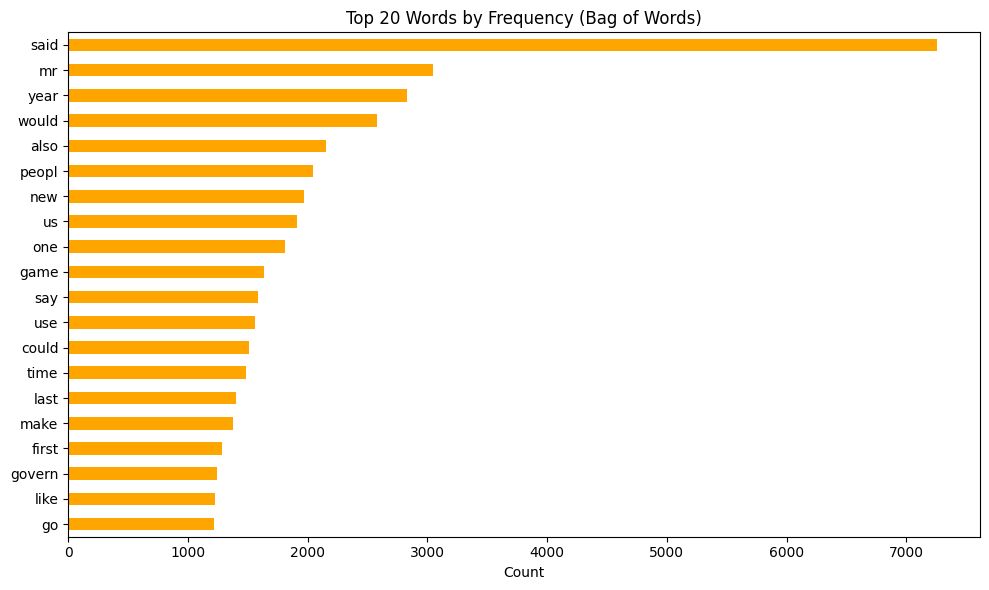

In [9]:
import matplotlib.pyplot as plt

# Total word frequency (across all articles)
word_freq = bow_df.sum().sort_values(ascending=False)

# Plot top 20
plt.figure(figsize=(10,6))
word_freq.head(20).plot(kind='barh', color='orange')
plt.title("Top 20 Words by Frequency (Bag of Words)")
plt.xlabel("Count")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [12]:
from nltk import ngrams

text = "I love learning AI"
tokens = text.split()

# Unigram
unigrams = list(ngrams(tokens, 1))
print("Unigrams:", unigrams)

# Bigram
bigrams = list(ngrams(tokens, 2))
print("Bigrams:", bigrams)

# Trigram
trigrams = list(ngrams(tokens, 3))
print("Trigrams:", trigrams)


Unigrams: [('I',), ('love',), ('learning',), ('AI',)]
Bigrams: [('I', 'love'), ('love', 'learning'), ('learning', 'AI')]
Trigrams: [('I', 'love', 'learning'), ('love', 'learning', 'AI')]


In [13]:
# Create corpus from the cleaned text
corpus = df['Cleaned_Text'].tolist()

# Check corpus size
print(f"🗂️ Corpus contains {len(corpus)} documents")

# Print first 3 documents in the corpus
for i, doc in enumerate(corpus[:3]):
    print(f"\n🔹 Document {i+1}:\n{doc}")


🗂️ Corpus contains 2225 documents

🔹 Document 1:
budget set scene elect gordon brown seek put economi centr labour bid third term power deliv ninth budget 1230 gmt expect stress import continu econom stabil low unemploy interest rate chancellor expect freez petrol duti rais stamp duti threshold â£60000 conserv lib dem insist voter face higher tax meanstest labour treasuri offici said preelect giveaway mr brown thought â£2bn spare increas stamp duti threshold â£60000 freez petrol duti extens tax credit scheme poorer famili possibl help pension stamp duti threshold rise intend help first time buyer like theme three main parti gener elect manifesto ten year ago buyer much greater chanc avoid stamp duti close half million properti england wale alon sell less â£60000 sinc averag uk properti price doubl start threshold stamp duti increas tax credit result number properti incur stamp duti rocket govern tax take liber democrat unveil propos rais stamp duti threshold â£150000 februari tori also

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Use BoW on the corpus
bow_vectorizer = CountVectorizer(max_features=1000)
X_bow = bow_vectorizer.fit_transform(corpus)

# Convert to DataFrame
bow_df = pd.DataFrame(X_bow.toarray(), columns=bow_vectorizer.get_feature_names_out())
bow_df.head()


,10,100,11,12,13,15,16,18,20,2000,...,worri,worth,would,write,wrong,year,yet,york,young,yuko
0,0,0,0,0,0,0,0,0,0,1,...,0,0,2,0,0,2,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,10,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,1,0,...,0,0,3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
